# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns.pandas default.
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model. all statistical models are here
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# to build linear regression_model
from sklearn.linear_model import LinearRegression



# Data Overview


### Understanding the structure of the data

In [2]:
## Reading a dataset from a csv file using pandas.
df = pd.read_csv('used_device_data.csv')


In [3]:
# first 5 dataset details
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [4]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 3454 rows and 15 columns.


#### Observations:

* The dataset has 3454 rows and 15 columns.
* Data in each row contains the different attributes of used/refurbished phones and tablets.
* brand_name, 4g, 5g, os are categorial and others are numerical.
* brand_name contains the name of manufacturing brand
* OS says on which OS the device runs
* screen_size shows the size of the screen in cm
* 4g shows whether 4G is available or not
* 5g shows whether 5G is available or not
* main_camera_mp shows the resolution of the rear camera in megapixels
* selfie_camera_mp shows the resolution of the front camera in megapixels
* int_memory represents the amount of internal memory (ROM) in GB
* ram represents the amount of RAM in GB
* battery shows the energy capacity of the device battery in mAh
* weight represents  weight of the device in grams
* release_year shows the year the device model was released
* days_used shows the number of days the used/refurbished device has been used
* new_price has the price of a new device of the same model in euros
* used_price has the price of the used/refurbished device in euros

In [5]:
# creating a copy of the data so that original data remains unchanged
df = df.copy()

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

#### Observations: 
* There are no duplicate values in the data.

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


#### Observations: 
* The datatypes of the different columns in the dataset are int(2 nos), float(9 no), object(4 no).
* There is missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight which needs to be fixed. 
* Memory usage is 404.9+ KB.
* Dependent variable is the used_price, which is of *float* type.


In [8]:
#lets first handle missing values
# checking for missing values in the data.
df.isnull().sum().sort_values(ascending=False)


main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

#### Observations: 
* There are missing values in main_camera_mp(179), weight(7), battery(6), int_memory(4), ram(4),  selfie_camera_mp(2).

# Exploratory Data Analysis (EDA)

In [9]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations:

* There are 34 different manufacturing brands in the data.
* There is 4 different operating systems.
* The screen size varies from 5.08 to 30.71 cm.
* The used price vary from 4.65 to 749.52 euros.
* The new price vary from 18.2 to 2560.2 euros.
* *Android* is the most popular type of OS.
* 2335 phones have 4g available and only 152 phones have 5g available.

In [10]:
#  To avoid any changes to original data, we are creating a copy.
df=df.copy()

## Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Screen Size

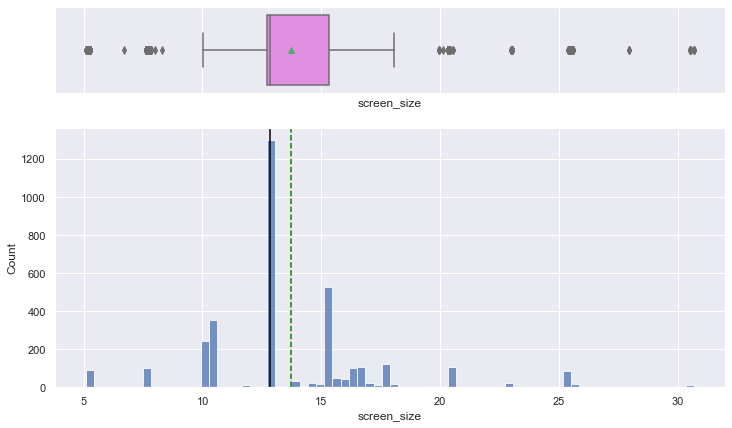

In [13]:
histogram_boxplot(df, "screen_size")

#### Observations:
* Mean is around 13 and median 12
* Screen size have many outliers
* Mean is higher than median

### Observations on resolution of the rear camera

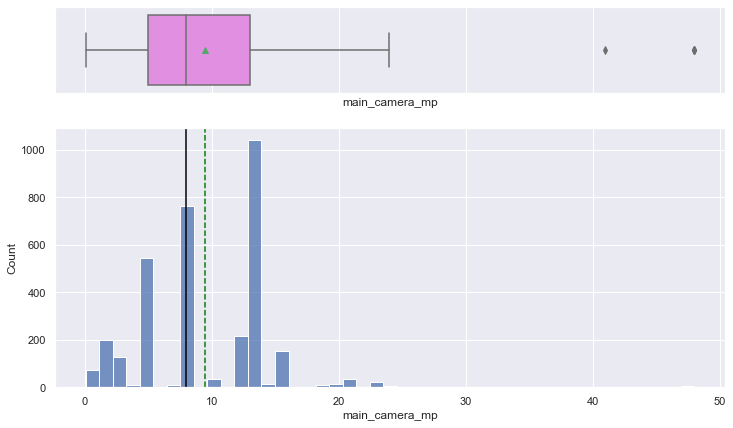

In [14]:
histogram_boxplot(df, "main_camera_mp")

#### Observations:
* Mean is around 9.5 and median 8
* Resolution of the rear camera have outliers
* Mean is slightly higher than median
* Outliers are above upperbound of IQR.

### Observations on resolution of the front camera

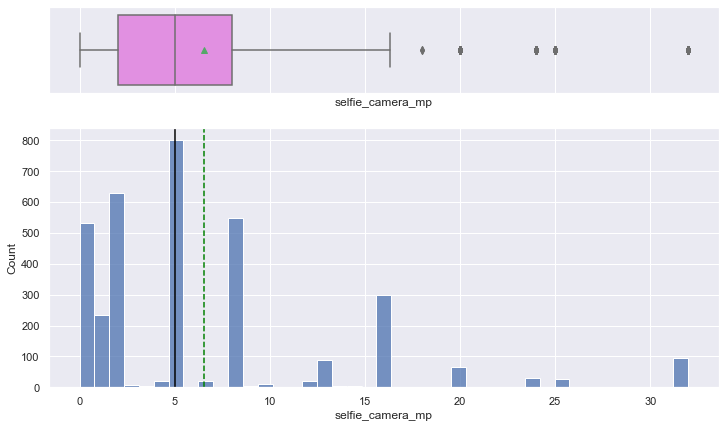

In [15]:
histogram_boxplot(df, "selfie_camera_mp")

#### Observations:
* Mean is around 6.5 and median 5
* Resolution of the front camera have many outliers on right side.
* Mean is higher than median


### Observations on amount of internal memory (ROM) 

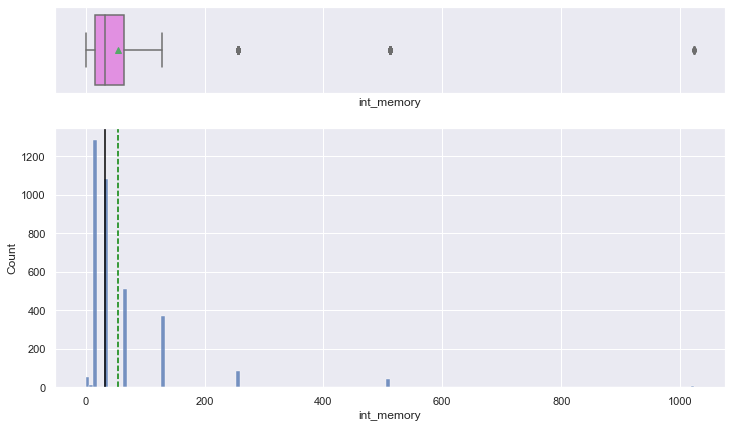

In [16]:
histogram_boxplot(df, "int_memory")


#### Observations:
* Mean is around 54 and median 32
*  Amount of internal memory have outliers
* Mean is higher than median

### Observations on Amount of RAM 

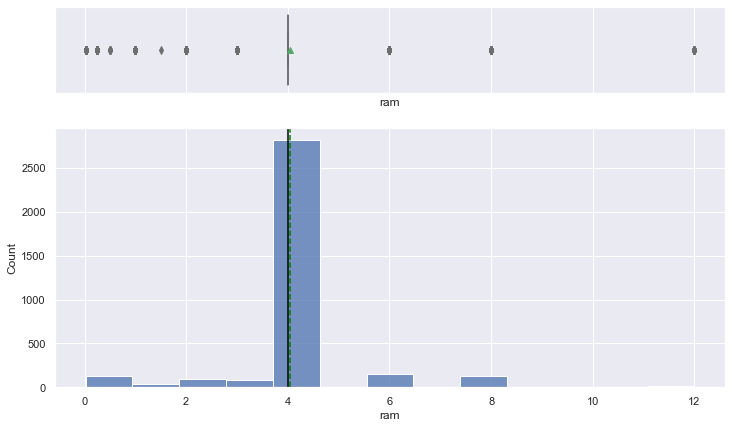

In [17]:
histogram_boxplot(df, "ram")

#### Observations:
* Mean is around 4 and median is 4
*  Amount of RAM have outliers


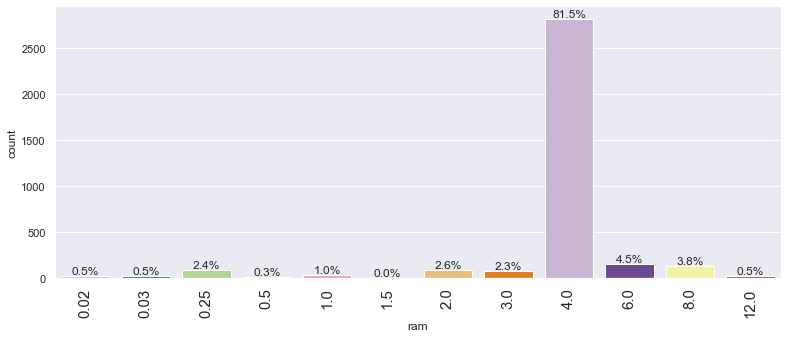

In [18]:
labeled_barplot(df, "ram", perc=True)

#### Observations:
* 81.5% of devices has 4.0 RAM

### Observations on Energy capacity of the device battery 

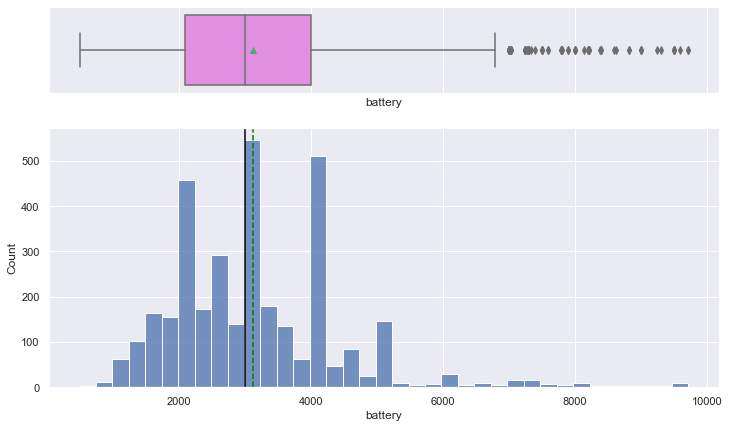

In [19]:
histogram_boxplot(df, "battery")

#### Observations:
* Mean is around 3133 and median 3000
*  Energy capacity of the device battery have outliers
* Mean is higher than median

### Observations on  Weight of the device 

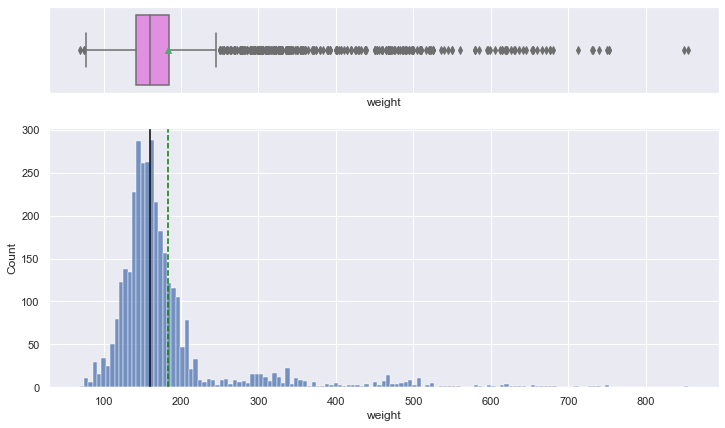

In [20]:
histogram_boxplot(df, "weight")

#### Observations:
* Mean is around 182 and median 160
*  Weight of the device have outliers
* Mean is higher than median

### Observations on number of days the used/refurbished device has been used

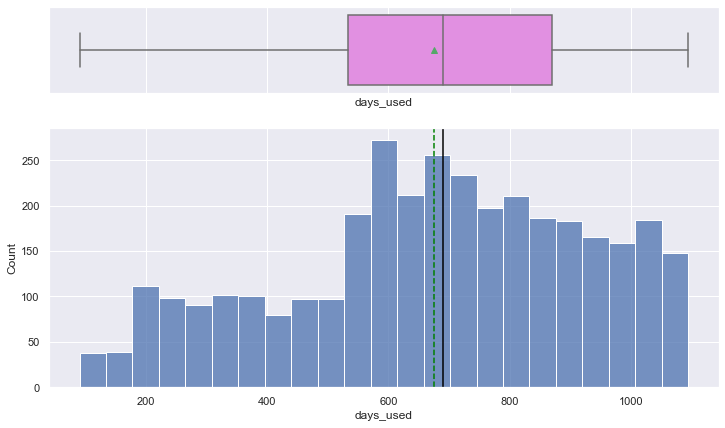

In [21]:
histogram_boxplot(df, "days_used")


#### Observations:
* Mean is around 674 and median 690
* Number of days the used/refurbished device has been used have no outliers
* Median is higher than mean

### Observations on price of a new device of the same model


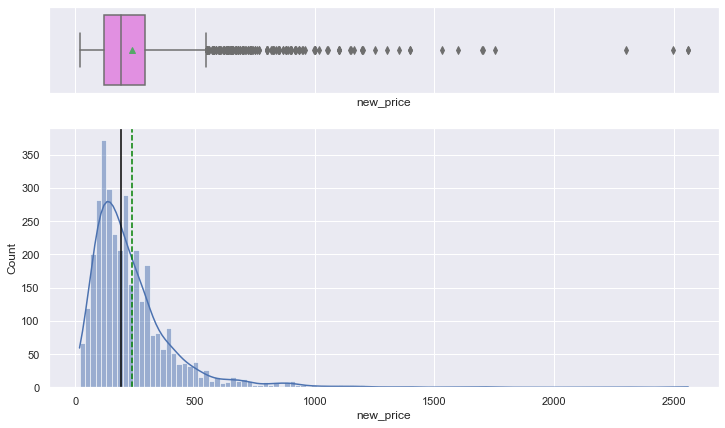

In [22]:
histogram_boxplot(df, "new_price",kde=True)

#### Observations:
* Mean is around 237 and median 189
* New price have outliers
* Mean is higher than median
* The distribution is right-skewed

In [23]:
#distribution is  skewed so log fn is used to reduce the range
df["new_price_log"] = np.log(df["new_price"])

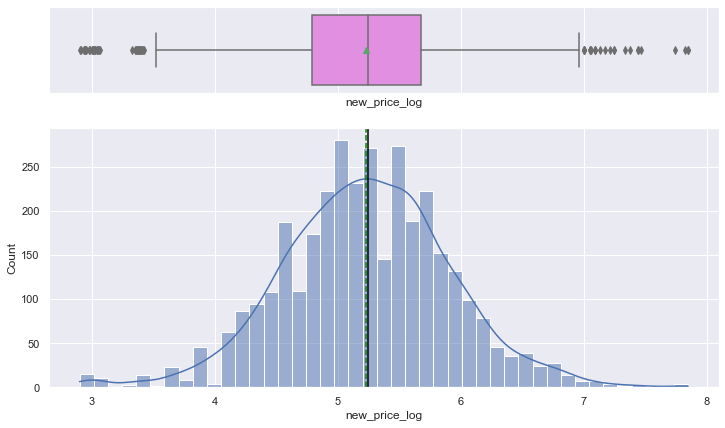

In [24]:
histogram_boxplot(df, "new_price_log",kde=True)

#### Observations:
* Mean and Median is 5.2.
* Distribution is normal

### Observations on price of the used/refurbished device


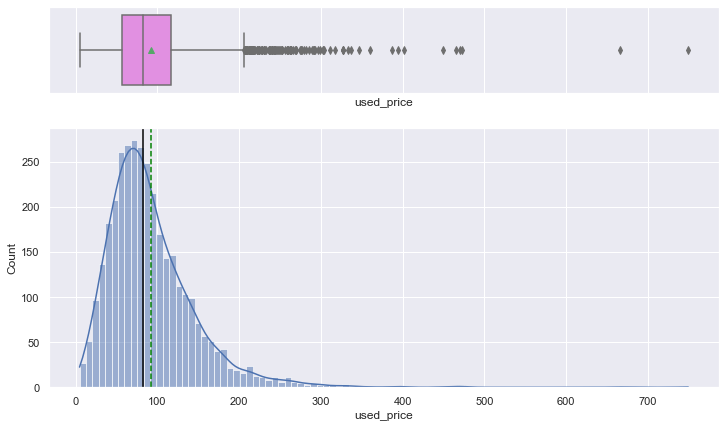

In [25]:
histogram_boxplot(df, "used_price",kde=True)

#### Observations:
* Mean is around 92 and median 81
* New price have outliers
* Mean is higher than median
* The distribution is heavily right-skewed,means lot of phones have high used price.

In [26]:
#distribution is  skewed so log fn is used to reduce the range
df["used_price_log"] = np.log(df["used_price"])


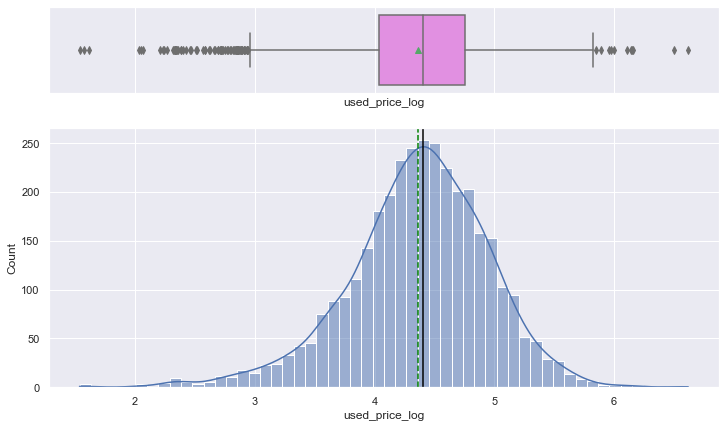

In [27]:
histogram_boxplot(df, "used_price_log",kde=True)

In [28]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations:

* There are 34 different manufacturing brands in the data.
* There is 4 OS.
* The screen size varies from 5.08 to 30.71 cm.
* The used price vary from 4.65 to 749.52 euros.
* The new price vary from 18.2 to 2560.2 euros.
* The used price vary from 1.53 to 6.6 euros.
* The new price_log vary from 2.9 to 7.8 euros.
* *Android* is the most popular type of OS.
* There is 2335 phones with 4g.
* new_price_log has mean 5.2 and median 5.2 
* used_price_log has mean 4.3 and median 4.4

### Observations on OS

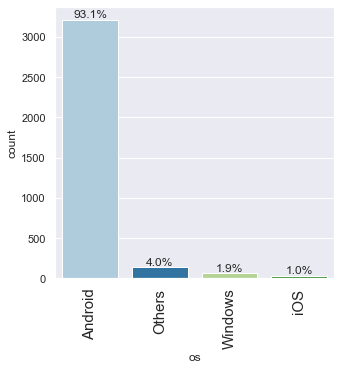

In [29]:
labeled_barplot(df, "os", perc=True)

In [30]:
# Check OS
df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

#### Observations:
* Most used os is Android (93.1%)

### Observations on brand name

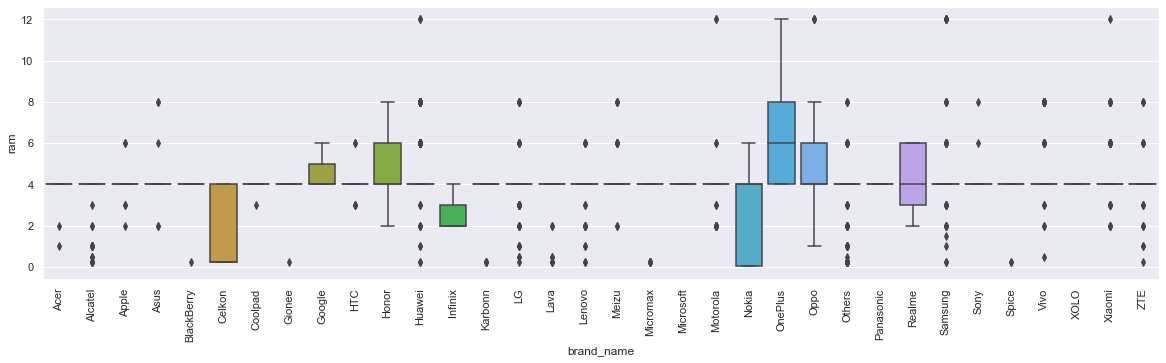

In [31]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.show()

#### Observations:
* There is lot of outliers present.
* The minimun, 25%, 50%, 75% and maximum RAM for several manufacturing brands are the same ie 4 GB.


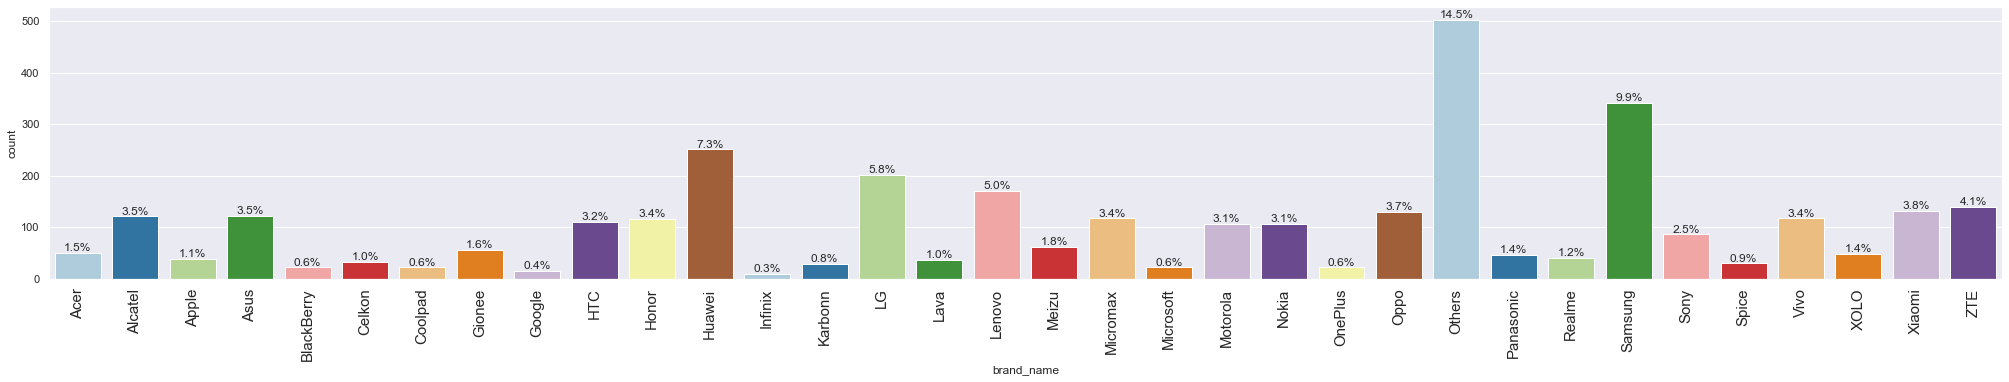

In [32]:

labeled_barplot(df, "brand_name", perc=True)

#### Observations:
* The number of refurbished phones with large screen Samsung(9.9%), Huawei(7.3%), others (14.5%).



### Observations on number of 4g

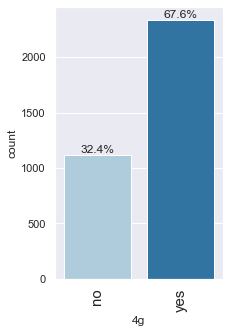

In [33]:
labeled_barplot(df, "4g", perc=True)


In [34]:
# Check 4g
df["4g"].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

#### Observations:
* There is 2335 devices have 4g.
* 67.6% of devices have 4g.

### Observations on number of 5g

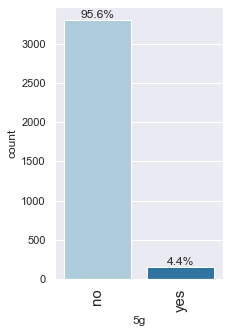

In [35]:
labeled_barplot(df, "5g", perc=True)

In [36]:
# Check 5g
df["5g"].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

#### Observations:
* 3302 devices has no 5g.
* Only 4.4% have 5g.

### Observations on number of products released in each year

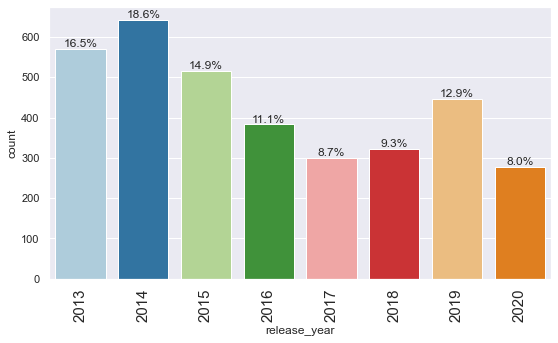

In [37]:
labeled_barplot(df, "release_year", perc=True)


In [38]:
df["release_year"].value_counts()

2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: release_year, dtype: int64

#### Observations:
* 18% of models are from 2014.
* There is a sharp of 10% drop in 3 yr(2014-2017).

## Multivariate Analysis 

### Observations on brand name vs days used. 

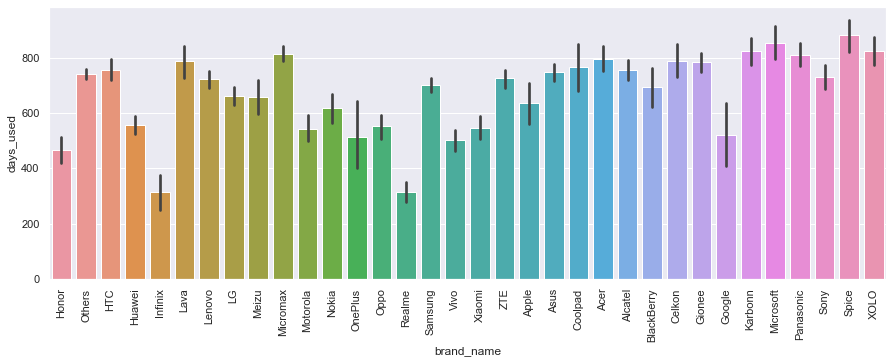

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="days_used")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Spice brand devices are the most used ones.

### Observations on brand name vs battery. 

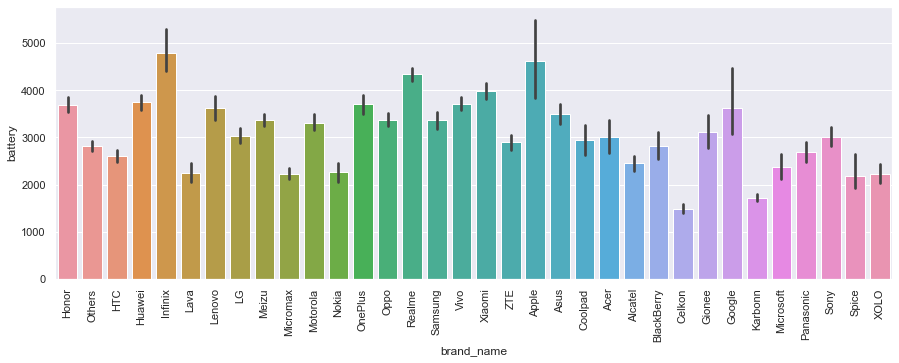

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Infinix brand has the most energy capacity battery
* Heavier battery could lead to more weight.

### Observations on brand name vs ram. 

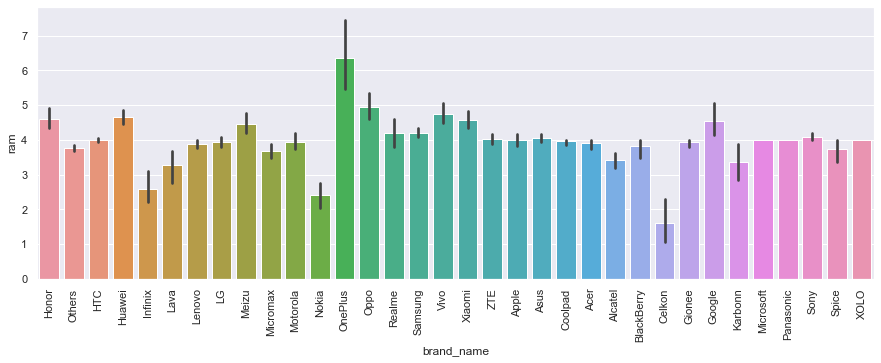

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Oneplus brand has the most amount of RAM

### Observations on brand name vs internal memory. 

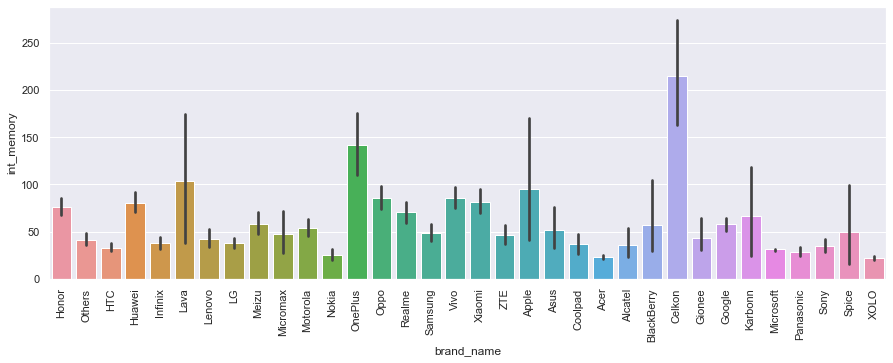

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="int_memory")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Celkon brand has the most internal memory.

### Observations on brand name vs used price.

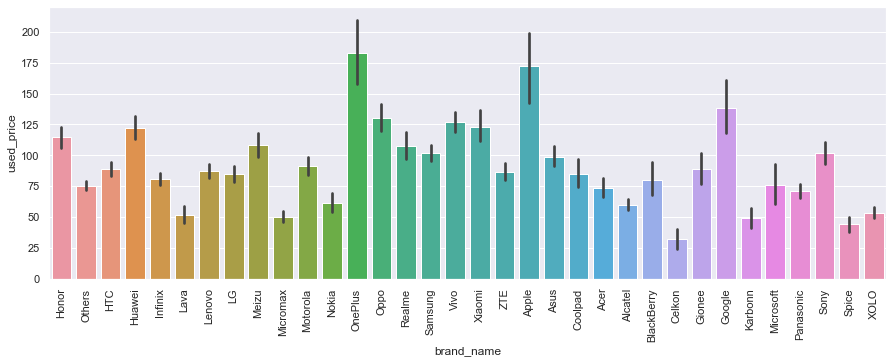

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="used_price")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* OnePlus brand has the most used price.

### Observations on release year vs new price. 

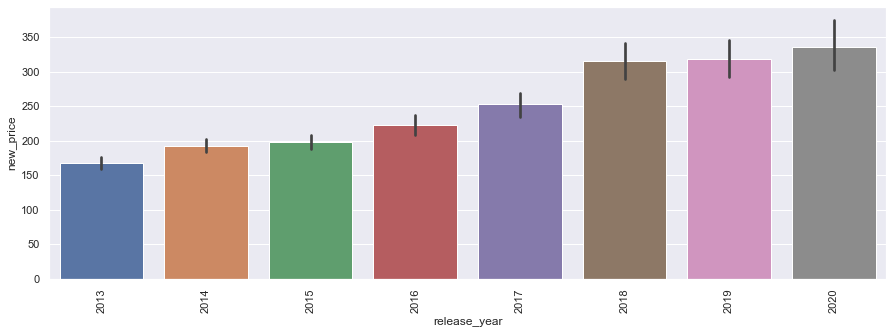

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="release_year", y="new_price")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* 2013 products are less expensive. 
* Older the products , lesser the price.

### Observations on brand name vs new price. 

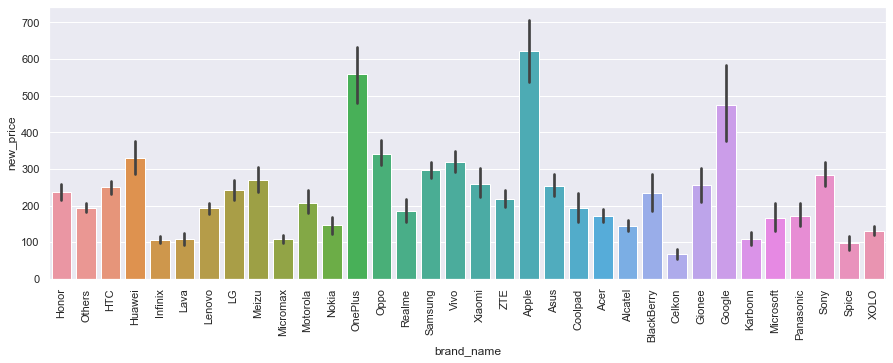

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="new_price")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Apple brand has the most new price.

### Observations on brand name vs weight. 

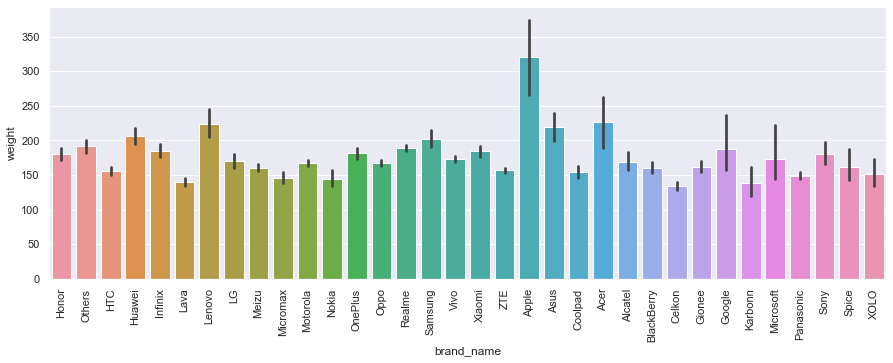

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Apple brand has the most weight.

### Observations using pairplot

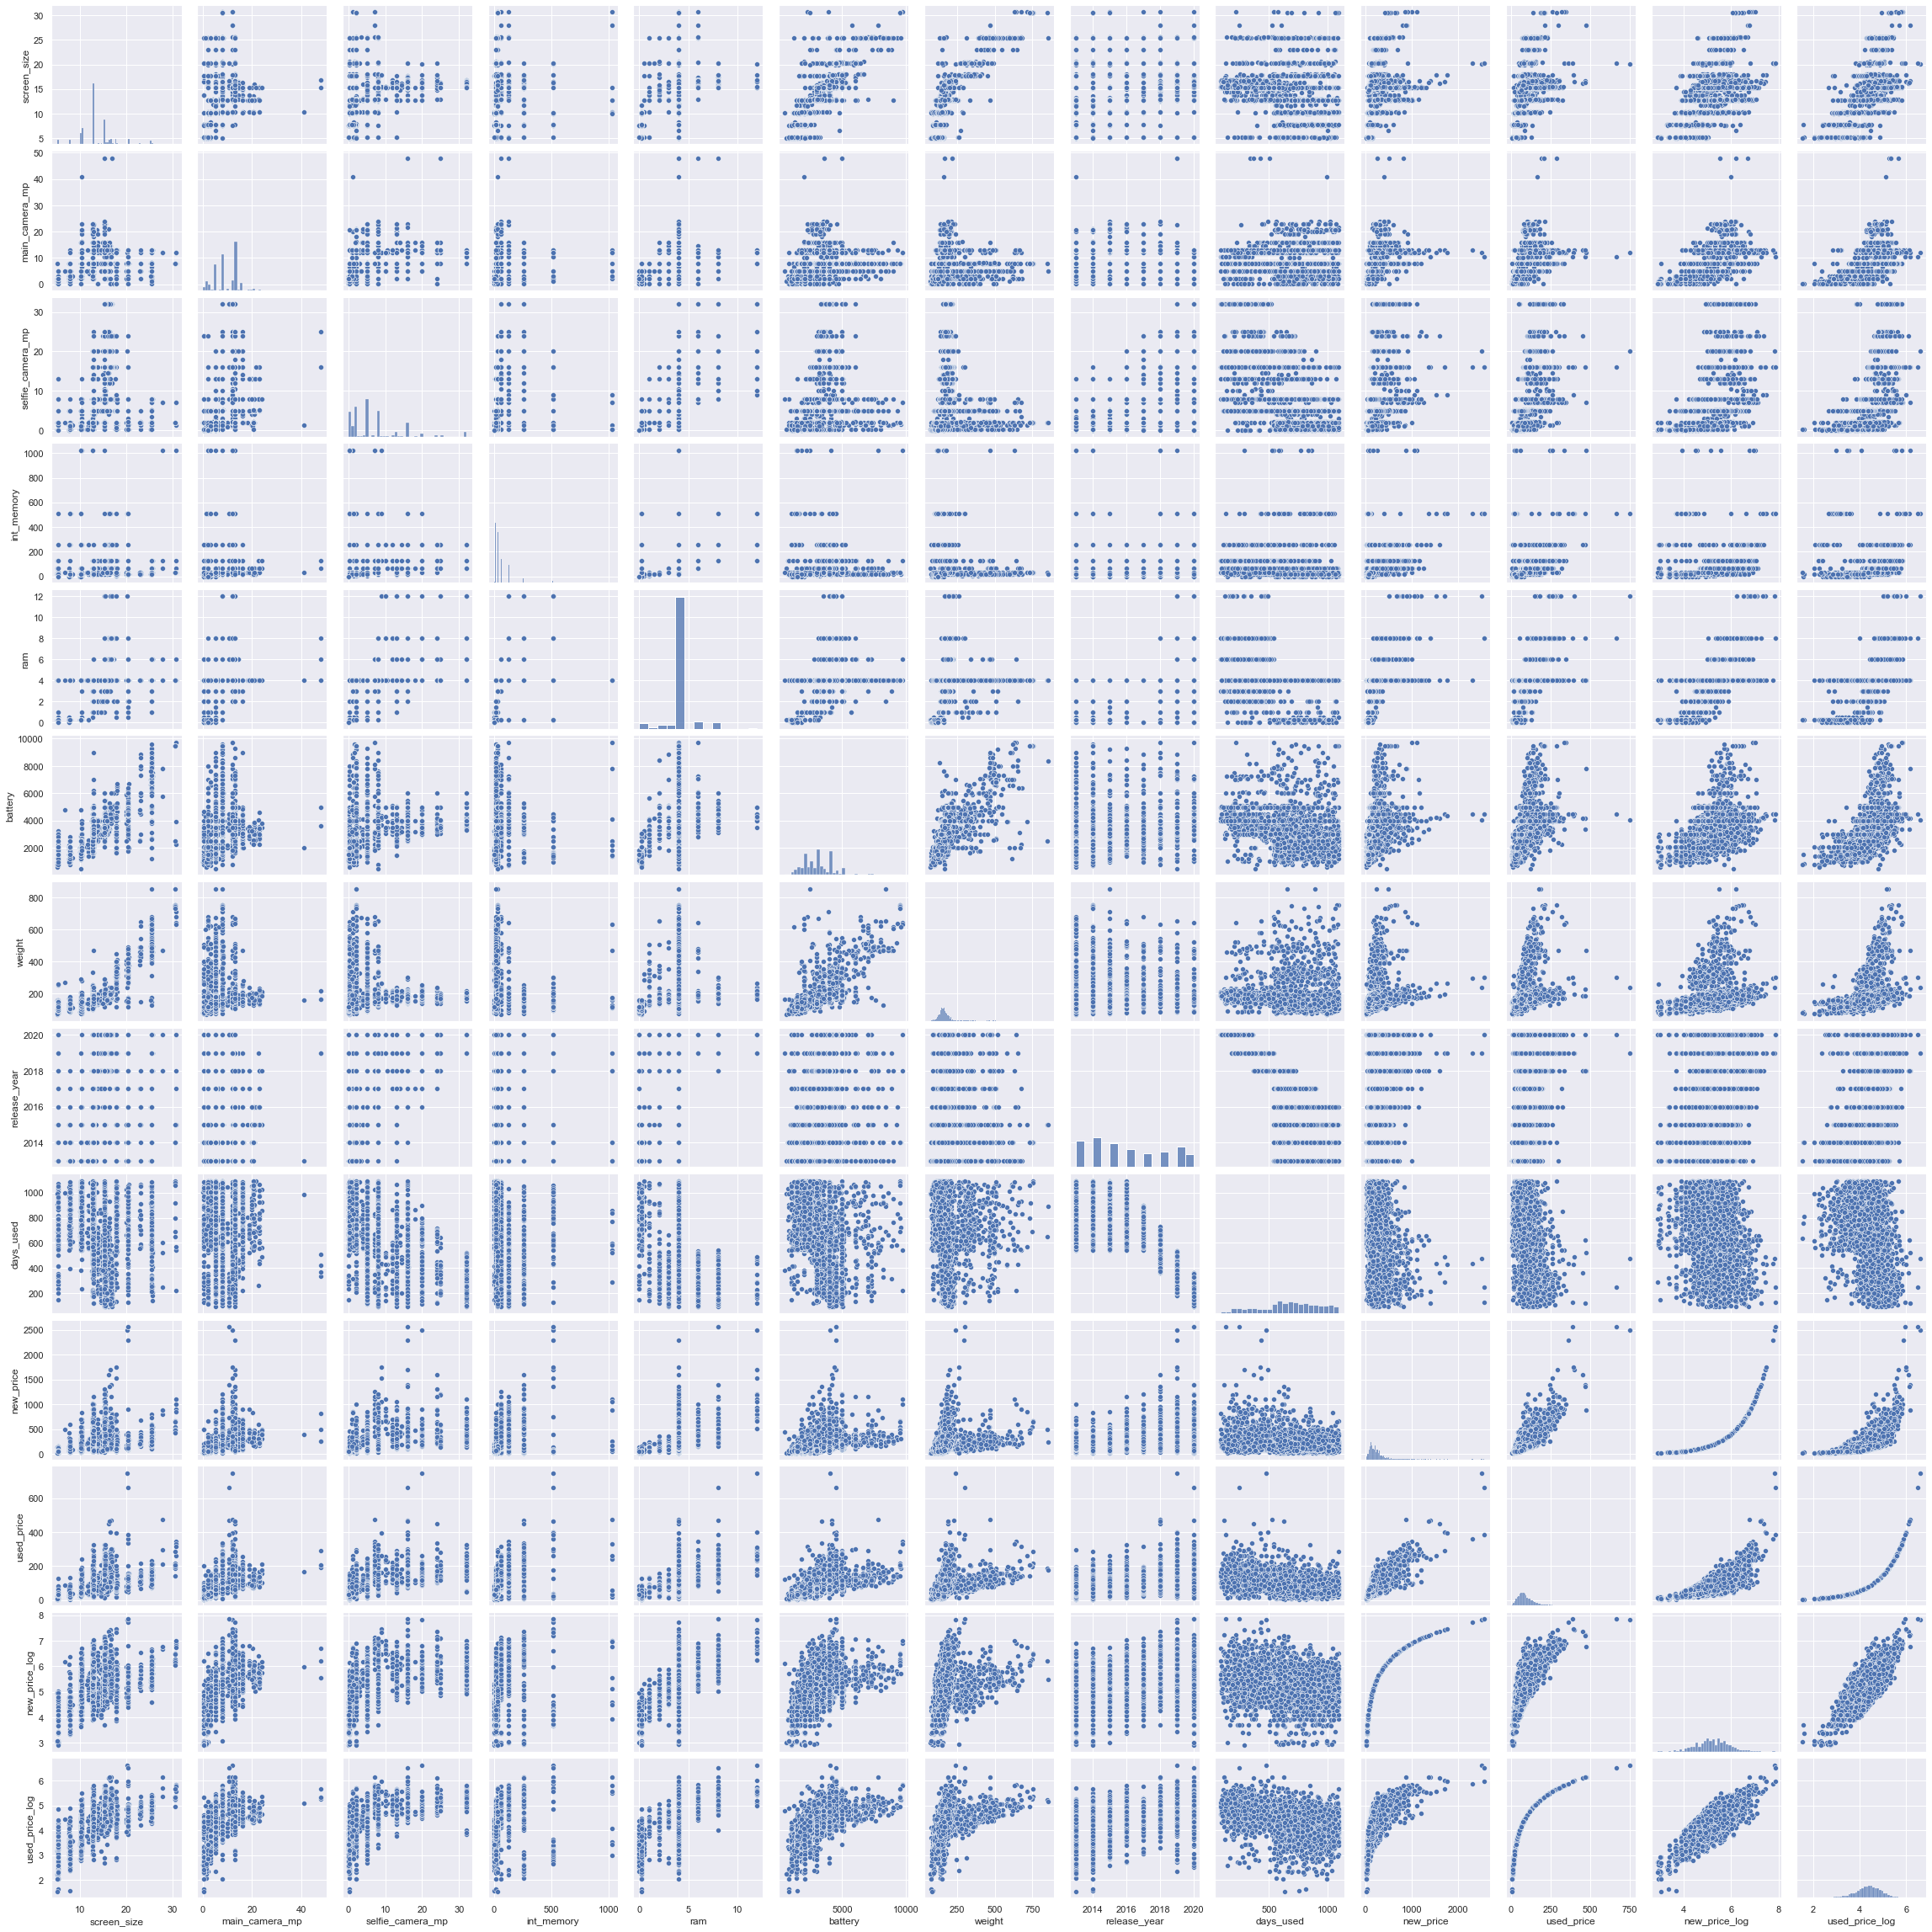

In [47]:
sns.pairplot(df)

 #### Observations:
* Above plot scatter diagrams are plotted for all the numerical columns in the dataset. 
* The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

### Observations from Heat map

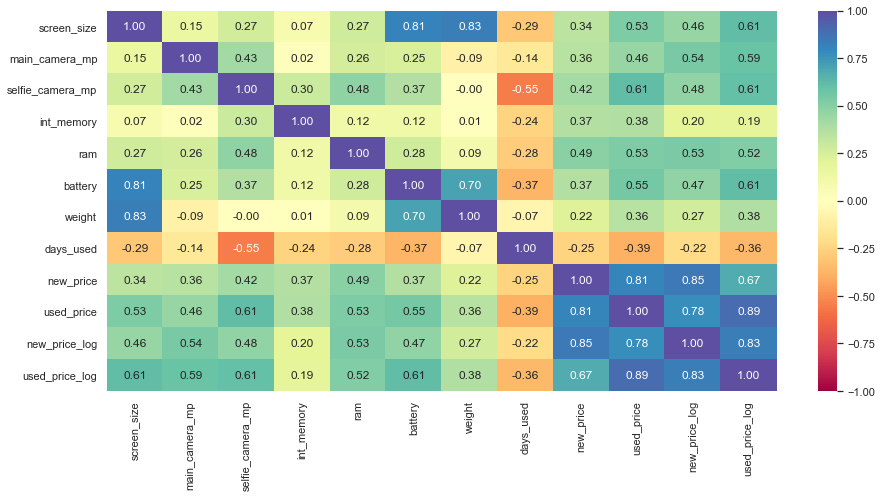

In [48]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

 #### Observations:
* battery and screen_size columns are highly correlated (0.81).
* weight and screen_size columns are highly correlated (0.83).
* battery and weight columns are highly correlated (0.71).
* used_price and new_price columns are very highly correlated (0.81)
* If the energy capacity of battery is more (large battery) then  weight will be more (0.71).
* used_price and used_price_log are negatively correlated with days_used (-0.39 and -0.36 respectively)
* used_price and used_price_log are strongly-positively correlated with new_price and new_price_log respectively (0.81 and 0.67).
* used_price and used_price_log are moderately-positively correlated with selfie_camera (0.61), main_camera (0.46 and 0.59), screen_size (0.53 and 0.61), battery (0.55 and 0.61). 


# Questions:

**1. What does the distribution of used device prices look like?**

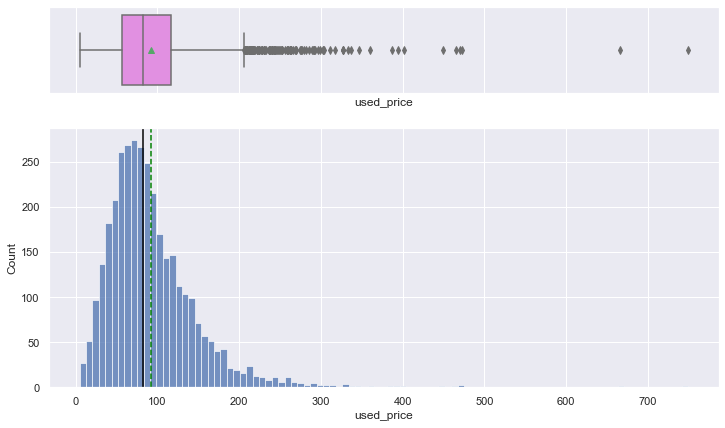

In [49]:
histogram_boxplot(df, "used_price")

#### Observations of used device prices  :
* The mean used_price is approx 92 and median 81
* New price have outliers
* Mean is higher than median
* The distribution is heavily right-skewed, indicating several phones have high used_price

**2. What percentage of the used device market is dominated by Android devices?**

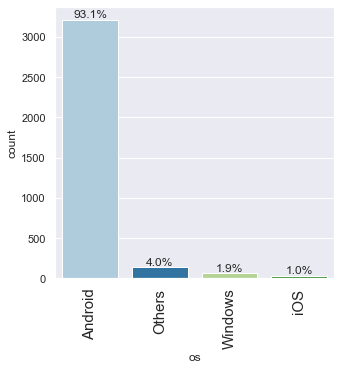

In [50]:
labeled_barplot(df, "os", perc=True)

#### Observations:
* More than  93.1%  of the used phone market is dominated by Andorid devices


In [51]:
# Check OS
df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

#### Observations:
Number of the used device market is dominated by Android devices (3214)



**3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

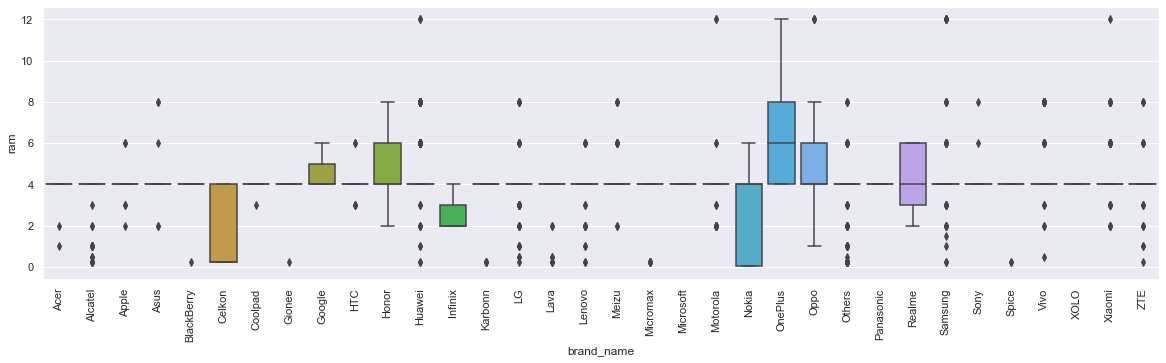

In [52]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Min 25%, 50%, 75% and Max of  RAM for several manufacturing brands are 4GB.
* There is outliers present. 

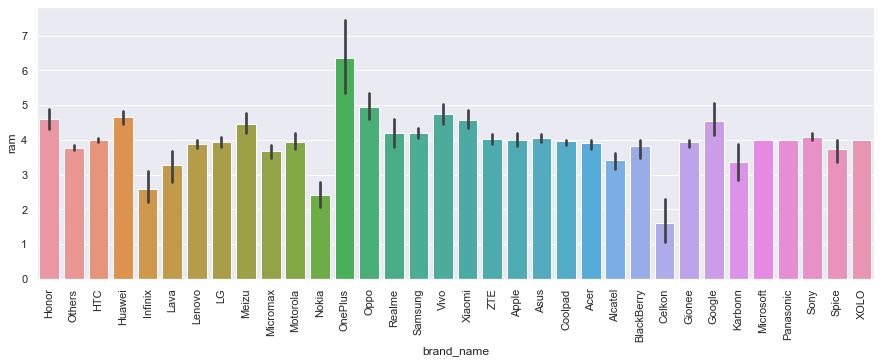

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Oneplus brand has the most amount of RAM.
* There is lot of outliers.
* The minimun, 25%, 50%, 75% and maximum RAM for several manufacturing brands are the same ie 4 GB.


**4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [54]:
df_large_battery = df[df.battery > 4500]
df_large_battery

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_log,used_price_log
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.630961,5.135387
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.947837,4.389995
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,117.94,105.36,4.770176,4.657383
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,248.90,71.37,5.517051,4.267878
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,201.14,95.23,5.304001,4.556295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,890.80,276.73,6.792120,5.623042
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,1054.45,268.88,6.960775,5.594265
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,165.66,119.30,5.109937,4.781641
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,1163.65,303.48,7.059317,5.715316


In [55]:
df_large_battery.shape

(341, 17)

#### Observations:
* There are 341 devices with large batteries.

In [56]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=False)

brand_name
Google       517.000000
Lenovo       442.721429
Apple        439.558824
Sony         439.500000
HTC          425.000000
Samsung      398.352000
Huawei       394.486486
Others       390.546341
Alcatel      380.000000
LG           366.058333
Acer         360.000000
Nokia        318.000000
Asus         313.772727
Honor        248.714286
Xiaomi       231.500000
Gionee       209.430000
Motorola     200.757143
Realme       196.833333
Vivo         195.630769
ZTE          195.400000
Oppo         195.000000
Infinix      193.000000
Panasonic    182.000000
Spice        158.000000
Micromax     118.000000
Name: weight, dtype: float64

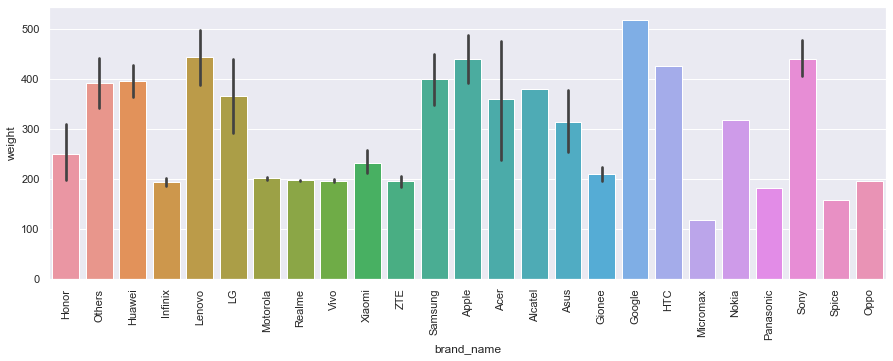

In [57]:
## code to create labeled_barplot for 'brand_name' in large battery dataframe
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

 #### Observations:
* Google brand has more weight, 517.0 grams.
* Less wgt is micromax, so it will be east to carry.

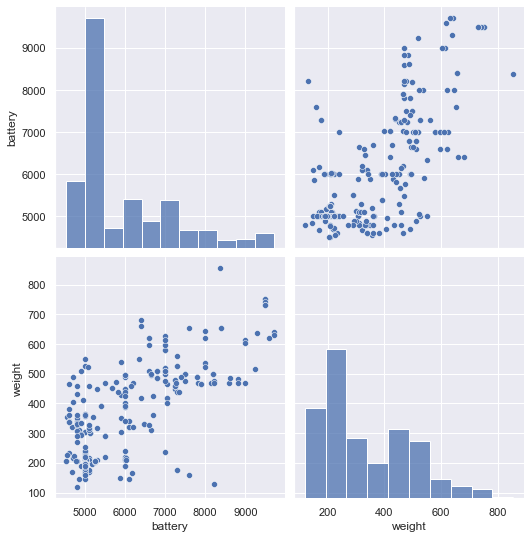

In [58]:
g = sns.pairplot(data = df_large_battery[["battery","weight"]])
g.fig.set_size_inches(8,8)
plt.show()

#### Observations:
* There is moderate correlation between a phone's weight and battery (.7) from heatmap above.
* As the battery size increases,so does weight.


**5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**


In [59]:
df_large_screen = df[df["screen_size"]>15.24]
df_large_screen

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_log,used_price_log
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.519018,5.162097
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,5.884631,5.111084
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.630961,5.135387
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.947837,4.389995
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.70,82.59,5.060694,4.413889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,538.04,164.17,6.287933,5.100902
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,1163.65,303.48,7.059317,5.715316
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33,6.483872,4.492337
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05,4.528829,4.357350


In [60]:
df_large_screen.shape

(1099, 17)

#### Observations:
* 1099 devices available across different brands with a screen size larger than 6 inches

In [61]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
Micromax       7
HTC            7
Google         4
Gionee         3
Coolpad        3
XOLO           3
Karbonn        2
Spice          2
Panasonic      2
Microsoft      1
Name: brand_name, dtype: int64

#### Observations:

* Brands with large screen are Huawei (149) Samsung (119).

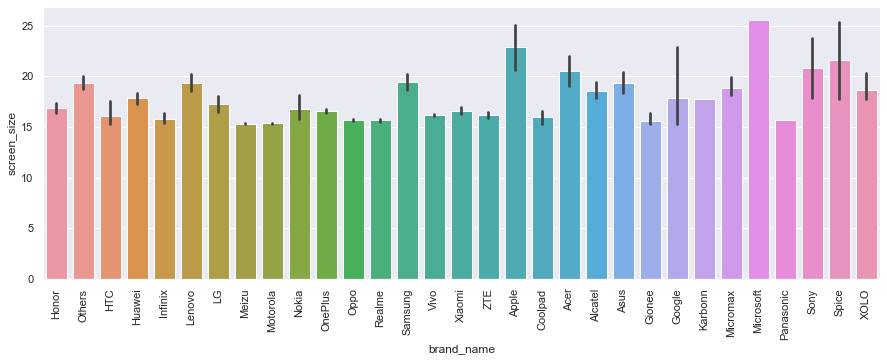

In [62]:
## code to create labeled_barplot for 'brand_name' in large screen dataframe
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_screen, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Microsoft brand has the most screen size.

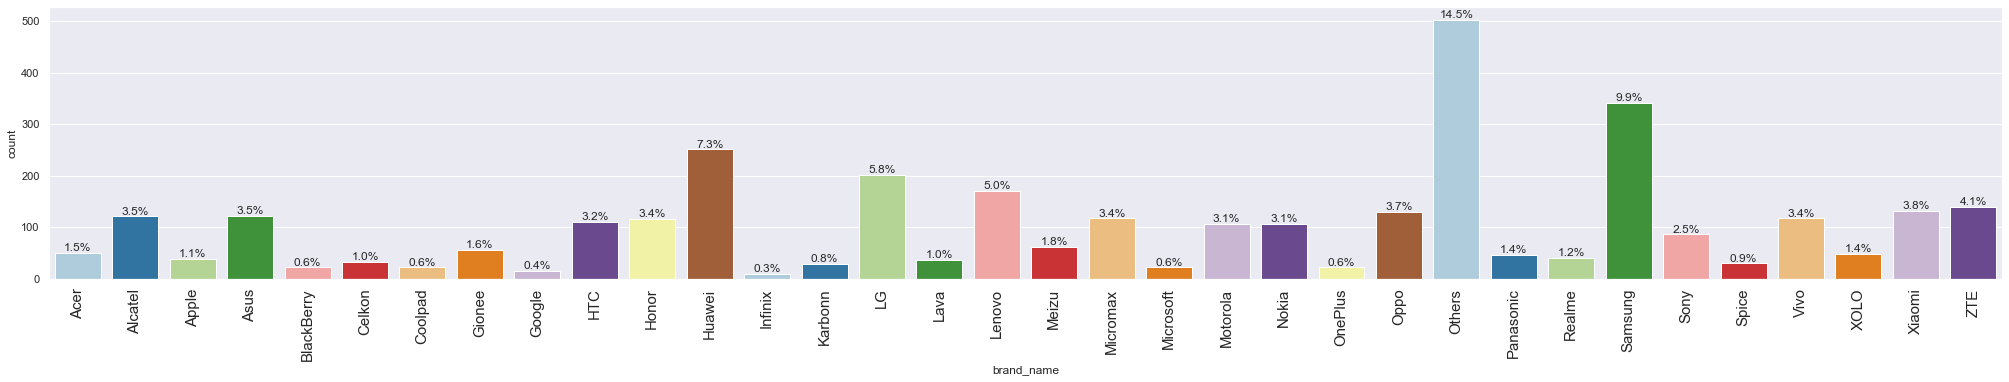

In [63]:
labeled_barplot(df, "brand_name", perc=True)

In [64]:
df.groupby("brand_name").mean()["new_price"].sort_values()

brand_name
Celkon         67.047879
Spice          98.000000
Infinix       106.017000
Lava          107.424722
Micromax      108.686239
Karbonn       109.371724
XOLO          130.898571
Alcatel       144.951240
Nokia         146.256132
Microsoft     166.366818
Panasonic     171.426596
Acer          172.867647
Realme        186.030488
Lenovo        192.096667
Others        193.258008
Coolpad       194.285455
Motorola      208.023491
ZTE           216.908143
BlackBerry    234.774545
Honor         236.857845
LG            241.547264
HTC           249.853818
Asus          254.049344
Gionee        255.379286
Xiaomi        259.326364
Meizu         269.569194
Sony          284.586744
Samsung       296.458592
Vivo          320.268291
Huawei        329.984143
Oppo          341.912326
Google        474.716667
OnePlus       558.230909
Apple         623.162564
Name: new_price, dtype: float64


#### Observations:
* The highest number of refurbished phones with large screen Others(14.5%), Samsung(9.9%), Huawei(7.3%).


## Feature engineering: Create a new column by creating bins as Less cost, Medium cost, High cost.

In [65]:
df.loc[df.new_price>0, "brand_name"] = "less_cost"
df.loc[df.new_price>=200, "brand_name"] = "medium_cost"
df.loc[df.new_price>=350, "brand_name"] = "high_cost"

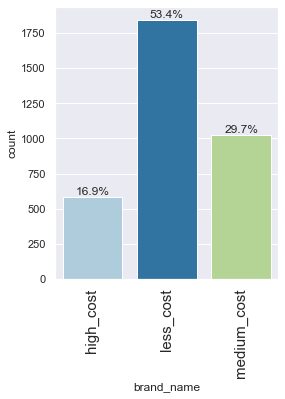

In [66]:
labeled_barplot(df, "brand_name", perc=True)

#### Observations:
* less_cost : 53.4% 
* medium_cost : 29.7% 
* high_cost : 16.9% 



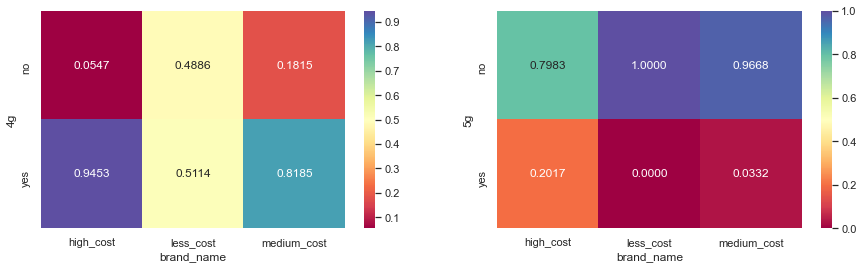

In [67]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["brand_name"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap( 
    pd.crosstab(df["5g"], df["brand_name"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral", ) 

plt.show()

#### Observations:
* 96% medium cost devices have no 5g.
* 79% high cost devices have no 5g.
* Less cost devices have no 5g.
* 94% high cost devices have  4g.
* 51% less cost devices have  4g.
* 81% medium cost devices have  4g.

**6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands??**


In [68]:
 ## code to create a dataframe having selfie_camera_mp > 8
df_great_selfie_camera_mp = df[df.selfie_camera_mp > 8]
df_great_selfie_camera_mp



,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_log,used_price_log
1,medium_cost,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.519018,5.162097
8,medium_cost,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,132.43,5.299916,4.886054
12,high_cost,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,499.68,217.73,6.213968,5.383256
13,medium_cost,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,221.13,101.25,5.398751,4.617593
16,medium_cost,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,249.12,151.77,5.517935,5.022366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,less_cost,Android,15.34,yes,no,12.0,16.0,32.0,3.0,4000.0,169.0,2019,369,155.89,116.79,5.049151,4.760377
3439,medium_cost,Android,15.34,yes,no,12.0,32.0,64.0,4.0,4000.0,169.0,2019,315,231.19,170.22,5.443240,5.137092
3440,high_cost,Android,15.44,yes,no,12.0,10.0,256.0,12.0,4300.0,196.0,2019,489,671.49,181.30,6.509499,5.200153
3441,high_cost,Android,15.32,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,2019,429,518.50,182.19,6.250940,5.205050


In [69]:
df_great_selfie_camera_mp.shape

(655, 17)

#### Observations:
* There are 655 refurbished phones with great selfie cameras across brands (i.e. > 8MP)

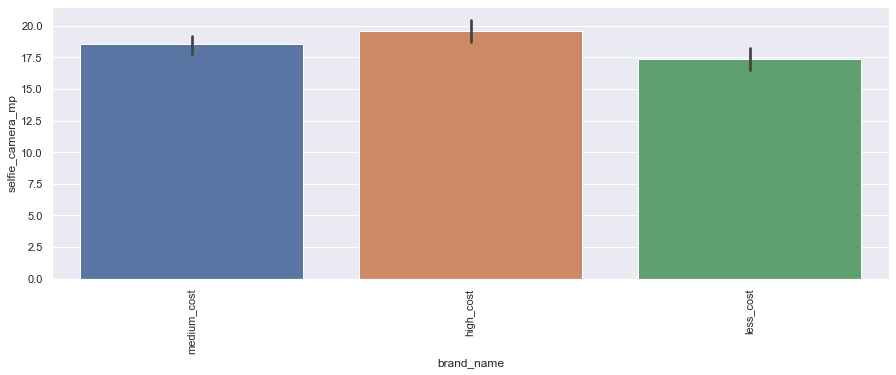

In [70]:
## code to create labeled_barplot for 'brand_name' in large screen dataframe
plt.figure(figsize=(15, 5))
sns.barplot(data=df_great_selfie_camera_mp, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

In [71]:
df_great_selfie_camera_mp.brand_name.value_counts()

high_cost      267
medium_cost    262
less_cost      126
Name: brand_name, dtype: int64

#### Observations:
* Most devices with high resolution selfie camera (8 megapixels) are expensive.
* There is 267 high cost, 262 medium cost and 126 less cost cameras with resolution of the rear camera >8 megapixels


## Observations of resolution of the rear camera >16  megapixels

In [72]:
 ## code to create a dataframe having selfie_camera_mp > 16
df_great_main_camera_mp = df[df.main_camera_mp > 16]
df_great_main_camera_mp


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_log,used_price_log
210,high_cost,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,336,819.57,289.47,6.708780,5.668052
215,high_cost,Android,16.89,yes,no,48.0,16.0,64.0,6.0,5000.0,215.0,2019,506,501.56,193.20,6.217723,5.263726
428,medium_cost,Windows,12.83,yes,no,21.0,8.0,32.0,4.0,2870.0,150.0,2015,824,219.47,98.59,5.391216,4.590970
595,high_cost,Android,15.24,yes,no,24.0,8.0,64.0,4.0,3500.0,204.4,2015,924,488.18,156.56,6.190684,5.053439
686,medium_cost,Android,12.83,yes,no,20.7,8.0,64.0,4.0,2950.0,193.0,2016,608,249.62,124.49,5.519940,4.824225
724,high_cost,Android,12.88,yes,no,23.0,8.0,64.0,4.0,3300.0,170.0,2017,796,440.95,153.67,6.088931,5.034807
737,medium_cost,Android,15.44,yes,no,23.0,8.0,32.0,4.0,4600.0,233.0,2016,980,299.19,156.67,5.701079,5.054142
738,medium_cost,Android,12.88,yes,no,23.0,8.0,64.0,4.0,3000.0,170.0,2016,676,230.05,115.52,5.438297,4.749444
825,medium_cost,Android,12.83,yes,no,21.0,8.0,32.0,4.0,3000.0,165.0,2016,560,299.26,149.62,5.701313,5.008099
827,medium_cost,Android,12.80,yes,no,18.0,2.0,32.0,4.0,3410.0,192.0,2015,805,270.78,91.20,5.601307,4.513055


In [73]:
df_great_main_camera_mp.shape

(94, 17)

#### Observations:
* There are 94 refurbished phones with great rear cameras across brands (i.e. > 16MP)

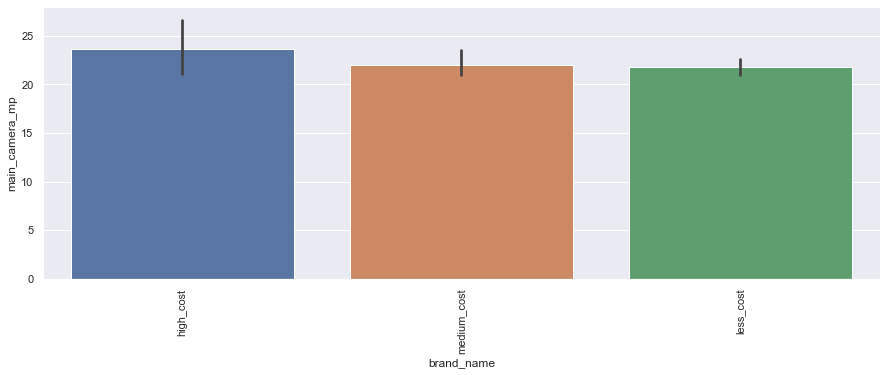

In [74]:
## code to create labeled_barplot for 'brand_name' in large screen dataframe
plt.figure(figsize=(15, 5))
sns.barplot(data=df_great_main_camera_mp, x="brand_name", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

In [75]:
df_great_main_camera_mp.brand_name.value_counts()

medium_cost    60
high_cost      29
less_cost       5
Name: brand_name, dtype: int64

#### Observations:
* Most devices with high resolution rear camera (16 megapixels) are expensive.
* There is 29 high cost,60 medium cost and 5 less cost cameras with resolution of the rear camera >16 megapixels

**7. Which attributes are highly correlated with the price of a used device?**

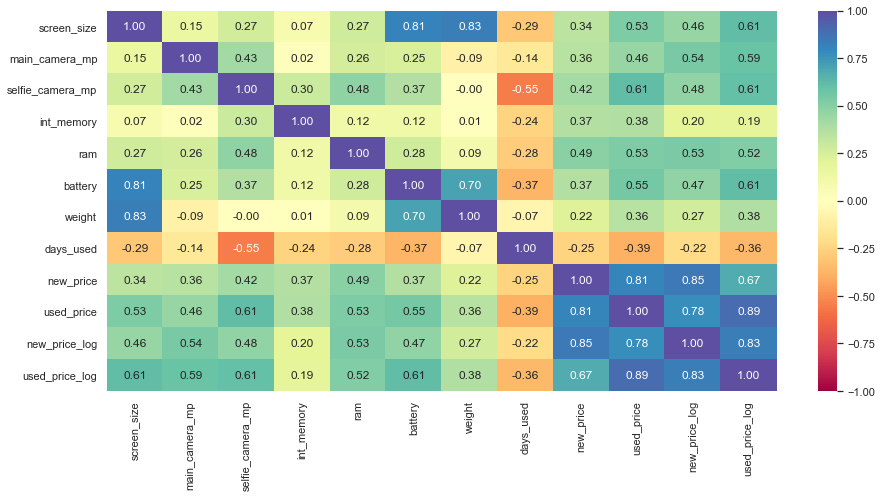

In [76]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



#### Observations:
* used_price and new_price columns are very highly correlated (0.81).
* used_price and days_used are negatively correlated (-0.39).
* used_price and selfie_camera_mp are moderately correlated (0.61).
* used_price and main_camera_mp are moderately correlated(0.46).
* used_price and screen_size is moderately correlated (0.53).
* used_price and battery is moderately correlated (0.55).

# Data Preprocessing

### Missing value treatment

In [77]:
df.drop("used_price", axis=1, inplace=True)
df.drop("new_price", axis=1, inplace=True)
df.drop("ram", axis=1, inplace=True)

In [78]:
# let's create a copy of the data
df1 = df.copy()

In [79]:
#checking for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
battery               6
weight                7
release_year          0
days_used             0
new_price_log         0
used_price_log        0
dtype: int64

#### Observation:
* main_camera_mo has 179,selfie_camera_mp has 2,int_memory has 4,ram has 4,battery has 6,weight has 7 missing values 

In [80]:


cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby("release_year")[col].transform(
        lambda x: x.fillna(x.median())
    )  

In [81]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(
        lambda x: x.fillna(x.median())
    )  

In [82]:
# filling the remaining missing values in the `main_camera_mp` column by the column median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) 



In [83]:
#checking for missing values
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
battery             0
weight              0
release_year        0
days_used           0
new_price_log       0
used_price_log      0
dtype: int64

#### Observation:
* No missing values

### Outlier detection and treatment

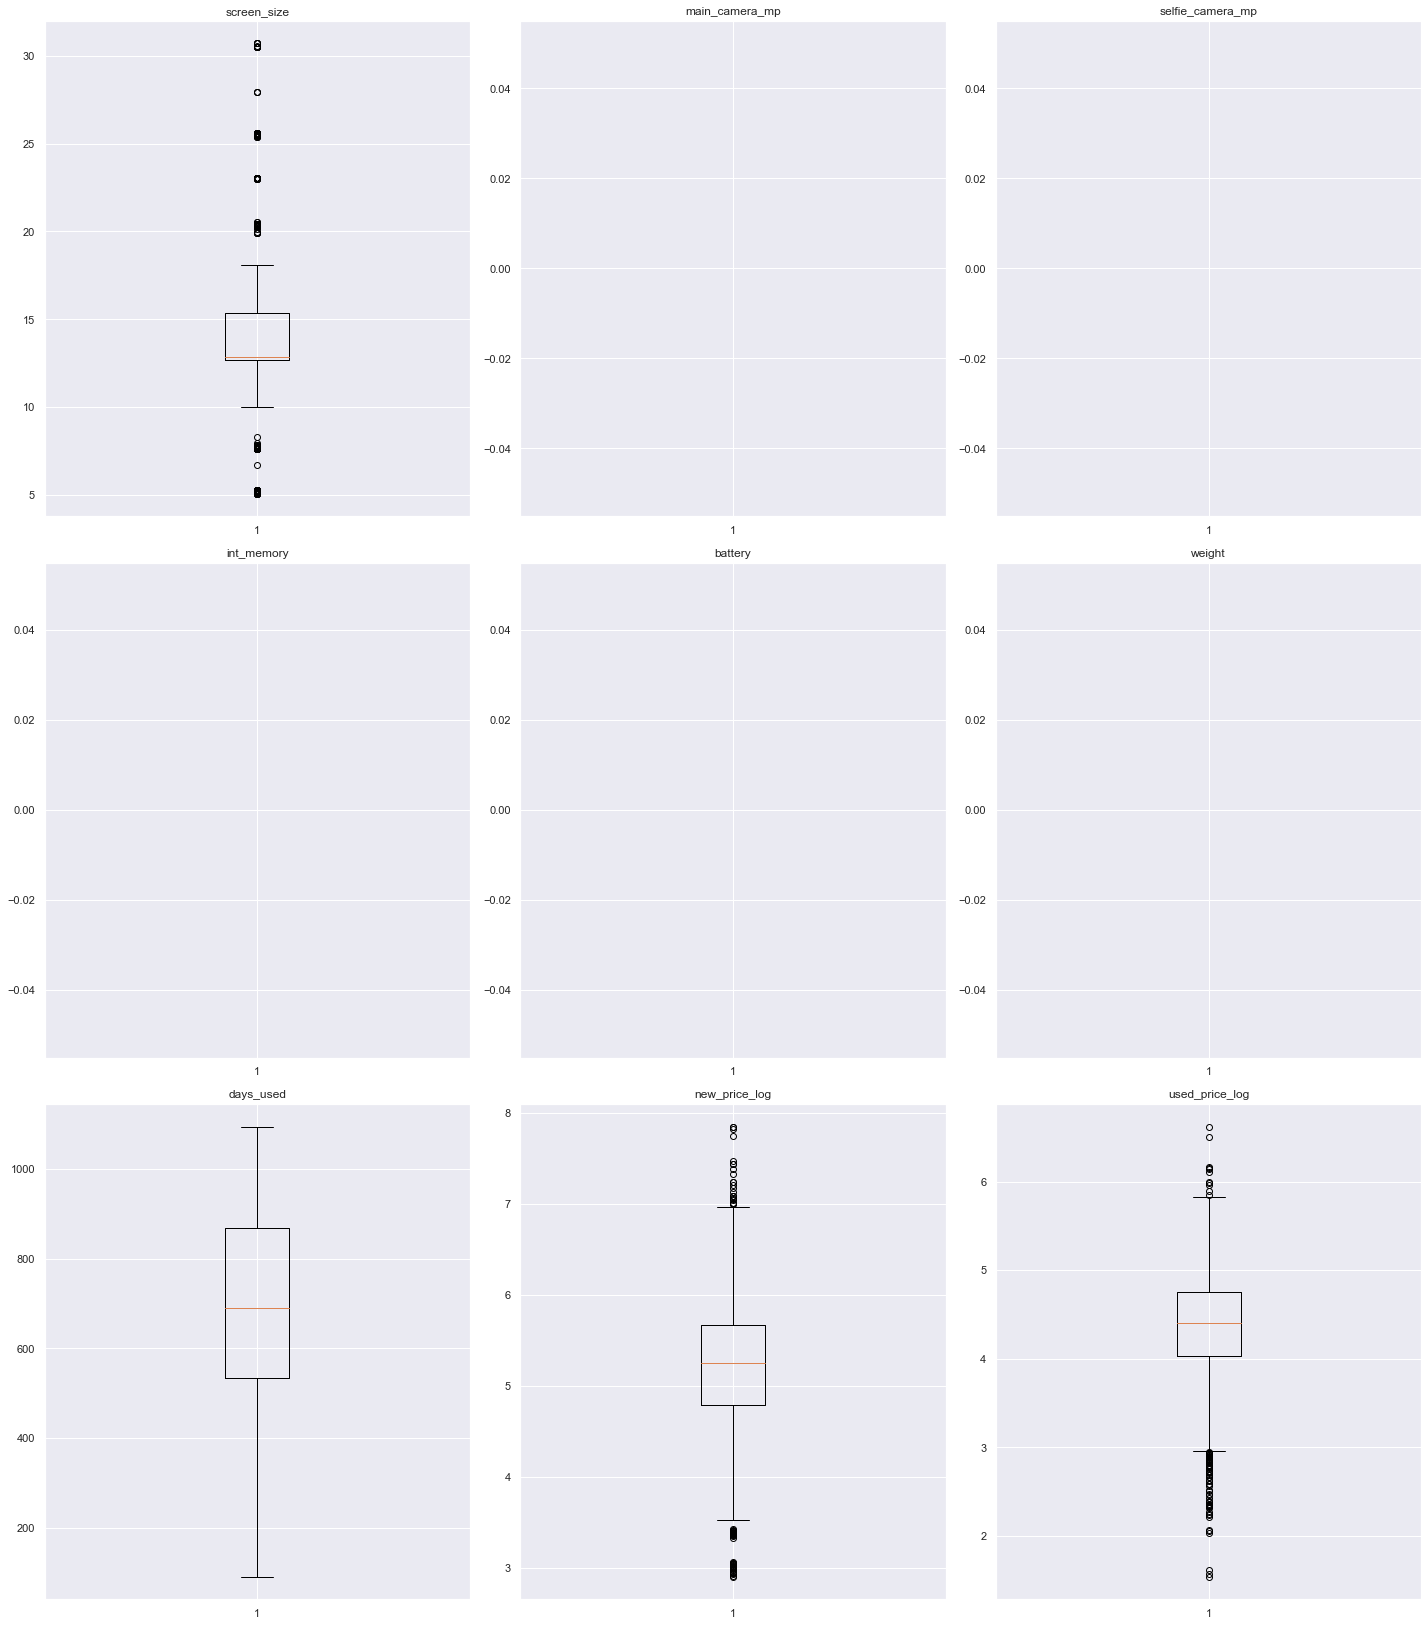

In [84]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

#   boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
    

#### Observations: 

* There is outliers in  used_price, new_price, screen_size. Also on new_price_log, used_price_log dependent columns.

In [85]:
def treat_outliers(df1, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df1


def treat_outliers_all(df1, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df1 = treat_outliers(df1, c)

    return df1

In [86]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df1 = treat_outliers_all(df1, numerical_col)

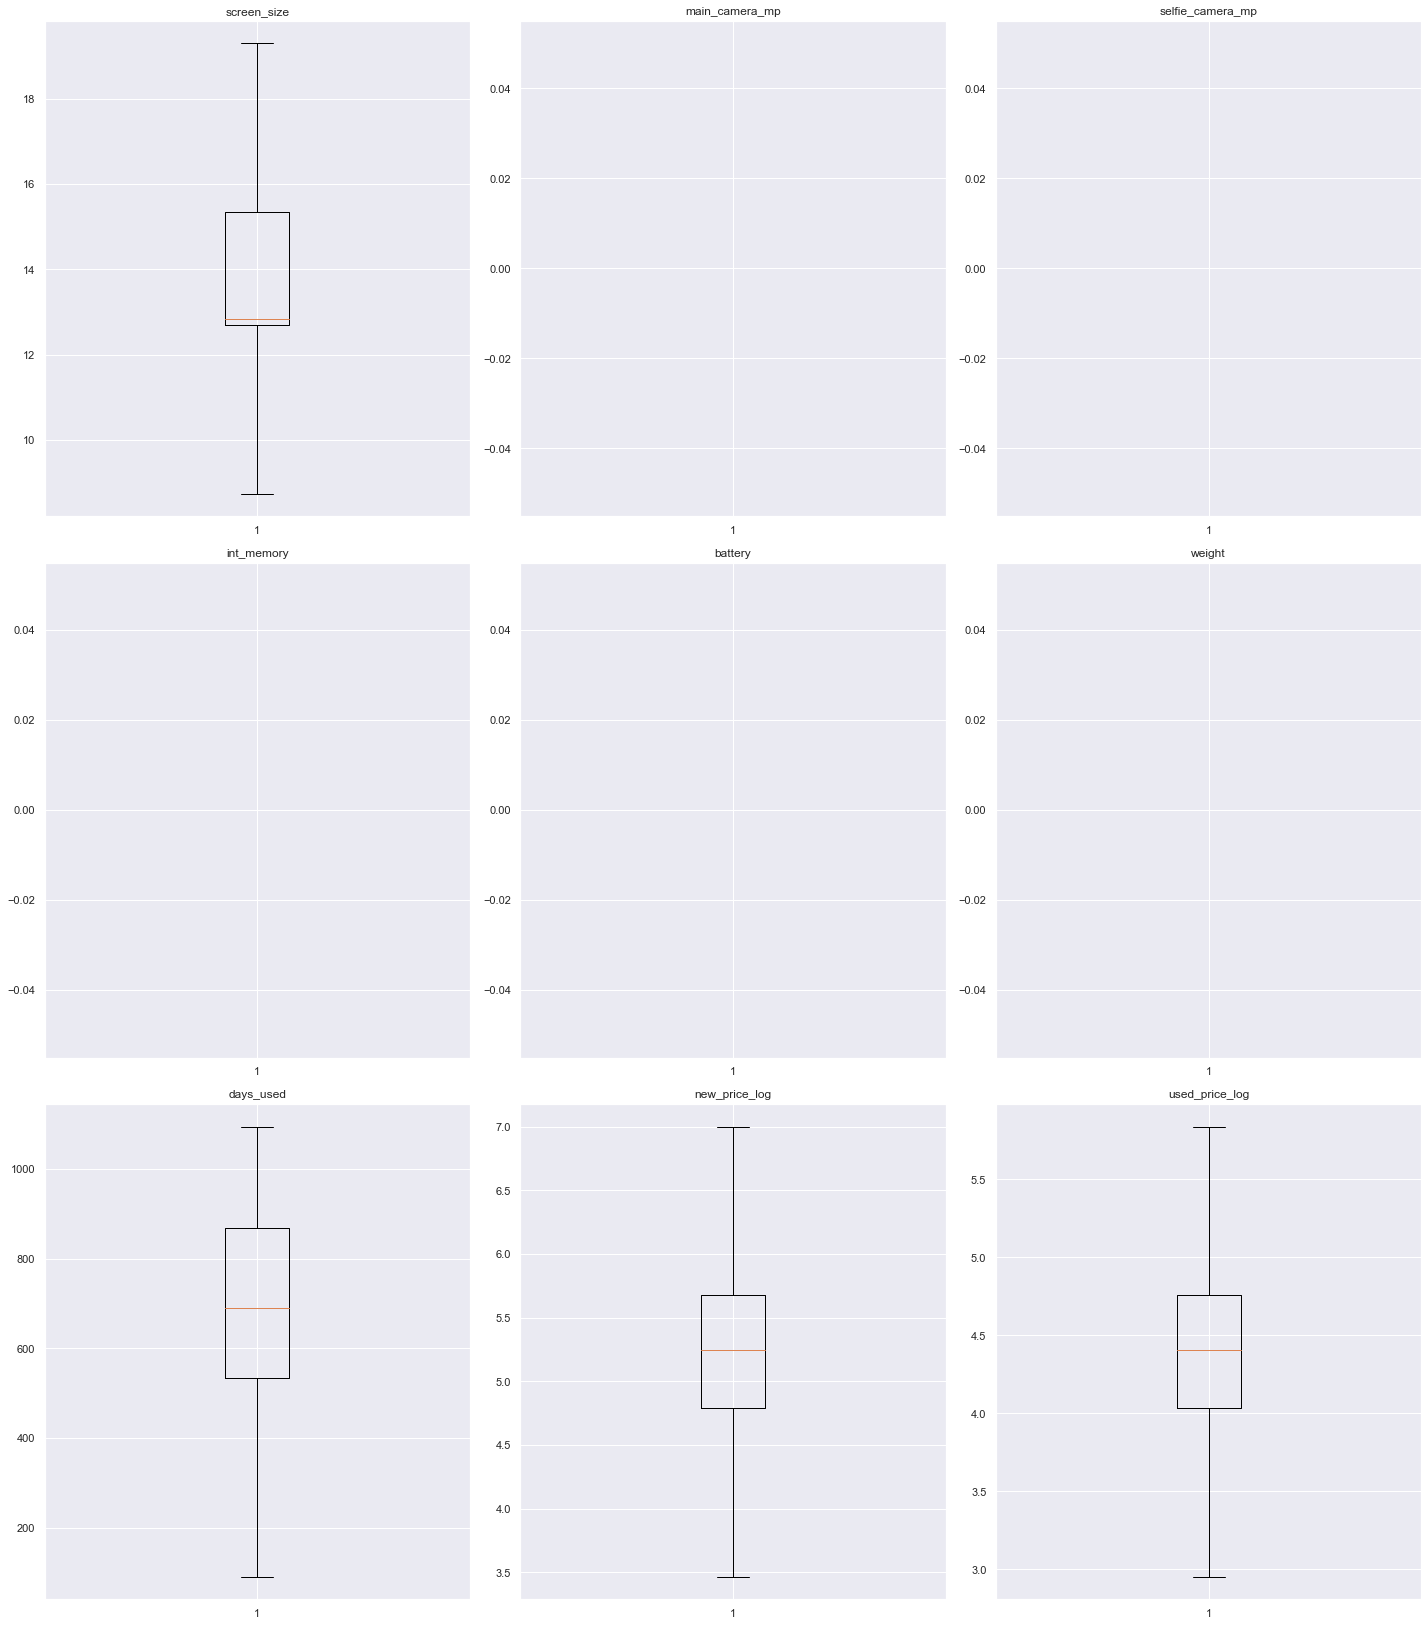

In [87]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
* All outliers have been treated

### Reanalyzing distribution of phones with large screen size ( >6 inches )

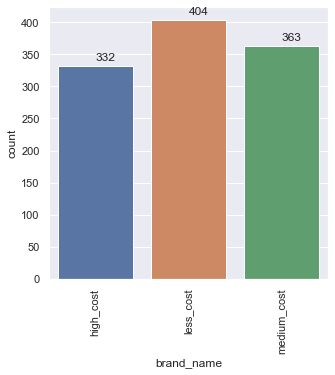

In [88]:

#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]
plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)


for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    
    ax.annotate(label,(x, y),size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

#### Observations:
* There is 332 high cost, 363 medium cost and 404 less cost cameras with phones with large screen size ( >6 inches)


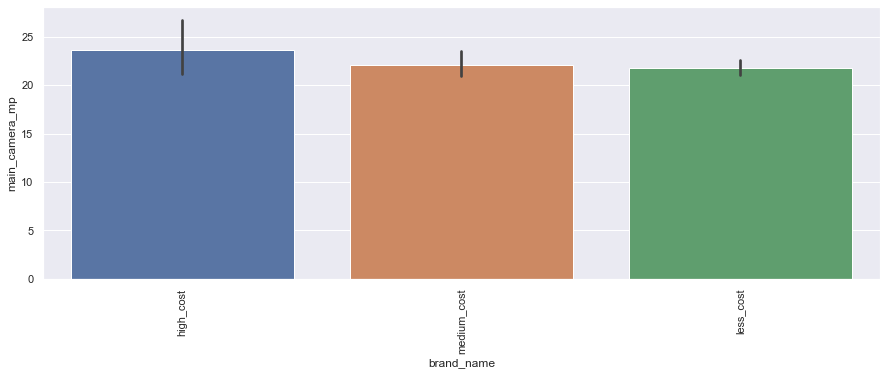

In [89]:
## code to create labeled_barplot for 'brand_name' in large screen dataframe
plt.figure(figsize=(15, 5))
sns.barplot(data=df_great_main_camera_mp, x="brand_name", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

In [90]:
df_great_main_camera_mp.brand_name.value_counts()

medium_cost    60
high_cost      29
less_cost       5
Name: brand_name, dtype: int64

### Reanalyse the  great selfie camera ( >8MP )

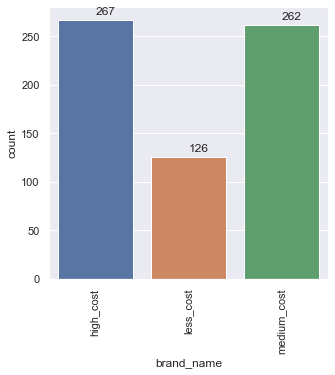

In [91]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

#### Observations:
* High cost brands offer the maximum number of refurbished phones with great selfie_camera (267 phones), followed by medium cost brands (262 phones) and then less cost brands (126 phones).

### Reanalyse the weight with battery

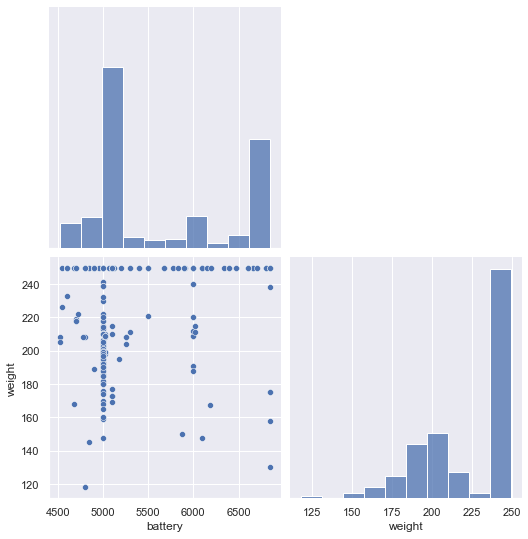

In [92]:
df_largebatteries = df[df["battery"]>4500]

g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True)
g.fig.set_size_inches(8,8)
plt.show()


#### Observations:
* used_price_log has no change in corelation with number of days_used (-0.36 vs. -0.36 before outlier treatment)
* used_price_log is still strongly-positively correlated with new_price_log(.83 vs .83 before outlier treatment).
* The linear correlation with selfie_camera (0.65vs. 0.61 before), main_camera (0.60 vs. 0.59 before), screen_size (0.64 vs. 0.61 before), battery ( 0.63 vs. 0.61 before) have all increased in comparison to values before outlier treatment

## Reanalyze linear correlation between numerical attributes and used phone price

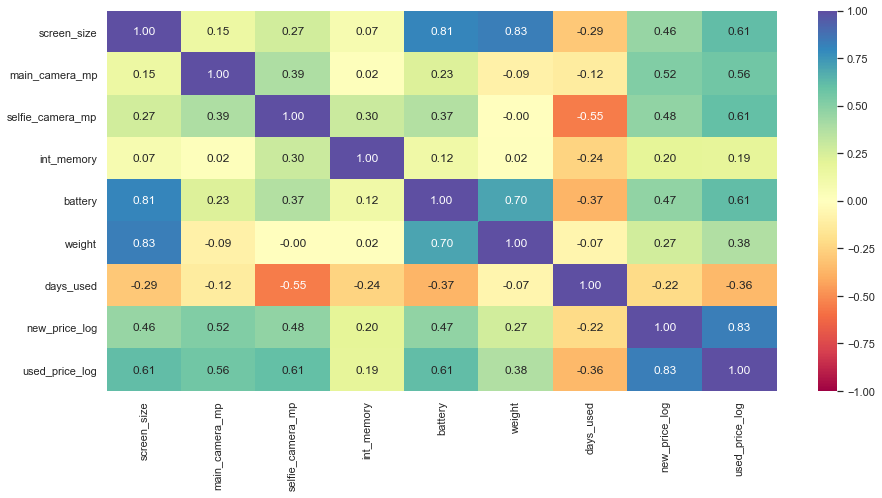

In [93]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


#### Observations:
* new_price_log and used_price_log, positively correlated (0.83)
* screen size and weight, positively correlated (0.83)
* new_price_log and battery, positively correlated (0.81)
* days_used and selfie_camera,negatively correlated (-0.55).
* days_used and battery,negatively correlated (-0.37).
* days_used and used_price_log,negatively correlated (-0.36).

# Model Building and Performance Check

In [94]:
# defining X and y variables
X = df1.drop(["used_price_log", "release_year"], axis=1) # since year is a temporal variable
y = df1["used_price_log"]

print(X.head())
print(y.head())

    brand_name       os  screen_size   4g   5g  main_camera_mp  \
0    less_cost  Android        14.50  yes   no            13.0   
1  medium_cost  Android        17.30  yes  yes            13.0   
2    high_cost  Android        16.69  yes  yes            13.0   
3  medium_cost  Android        25.50  yes  yes            13.0   
4    less_cost  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  new_price_log  
0               5.0        64.0   3020.0   146.0        127       4.715100  
1              16.0       128.0   4300.0   213.0        325       5.519018  
2               8.0       128.0   4200.0   213.0        162       5.884631  
3               8.0        64.0   7250.0   480.0        345       5.630961  
4               8.0        64.0   5000.0   185.0        293       4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: used_price_log, dtype: float64


In [95]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the function to create dummies for independent features

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,new_price_log,brand_name_less_cost,brand_name_medium_cost,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,1,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,1,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,7250.0,480.0,345,5.630961,0,1,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,1,0,0,0,0,1,0


In [96]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [97]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

### Checking the coefficients and intercept of the model

In [98]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.030635
main_camera_mp,0.022416
selfie_camera_mp,0.016181
int_memory,0.000132
battery,-0.000002
weight,0.000661
days_used,-0.000071
new_price_log,0.499881
brand_name_less_cost,0.185888
brand_name_medium_cost,0.093834


# Model performance evaluation

In [99]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [100]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233956,0.183511,0.843317,0.842338,4.426338


In [101]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234395,0.188638,0.838664,0.836294,4.509229


#### Observations

* Training R square is 0.84, means 84% of the variation in the train dataSo, the model is not underfitting
* Training vs testing :MAE (0.183511, 0.188638) , comparable, which shows that the model is not overfitting
* Training vs testing :RMSE (0.233956, 0.234395), comparable, which shows that the model is not overfitting
    

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [102]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train,x_train1).fit()##  code to fit OLS model
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     861.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:54:19   Log-Likelihood:                 81.409
No. Observations:                2417   AIC:                            -130.8
Df Residuals:                    2401   BIC:                            -38.17
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Observations

* Negative values of the coefficient show that used_price_log decreases with the increase of corresponding attribute value

* Positive values of the coefficient show that used_price_log increases with the increase of corresponding attribute value

* Variable with a p-value less than 0.05 would be considered significant But these variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values

### Test multicolinearlity: conditions
- VIF between 1 and 5, low multicollinearity
- VIF between 5 and 10, moderate multicollinearity
- VIF more than 10, high multicollinearity

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [104]:
checking_vif(x_train1)

,feature,VIF
0,const,395.612214
1,screen_size,7.652302
2,main_camera_mp,2.069402
3,selfie_camera_mp,2.187882
4,int_memory,1.220814
5,battery,3.735680
6,weight,5.994376
7,days_used,1.744127
8,new_price_log,5.392970
9,brand_name_less_cost,7.084694



#### Observations:

* screen_size of a phone is VIF(7.6) , so moderate multicollinearity
* new_price_log of a phone is VIF(5.3) , so moderate multicollinearity
* weight of a phone is VIF(5.99) , so moderate multicollinearity
* brand_name_less_cost has VIF of a phone is VIF(7.08) , so moderate multicollinearity

### Removing Multicollinearity: conditions

- Drop all columns one by one with VIF score greater than 5
- Check adjusted R-squared and RMSE of all these models
- Drop the variable that makes the least change in adjusted R-squared
- Check the VIF scores again
- Continue till you get all VIF scores under 5

In [105]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [106]:
col_list = ["screen_size","weight","new_price_log","brand_name_less_cost"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.840721,0.235936
1,brand_name_less_cost,0.838910,0.237273
2,screen_size,0.837202,0.238527
3,new_price_log,0.778651,0.278133


#### Observation:
* We will drop weight and check for VIF again

In [107]:
col_to_drop = "weight"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,388.193456
1,screen_size,3.459772
2,main_camera_mp,1.986530
3,selfie_camera_mp,2.084277
4,int_memory,1.220733
5,battery,3.512995
6,days_used,1.662758
7,new_price_log,5.392753
8,brand_name_less_cost,7.055585
9,brand_name_medium_cost,3.117012


In [108]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [109]:
col_list = ["new_price_log","brand_name_less_cost"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_less_cost,0.838910,0.237273
1,new_price_log,0.778651,0.278133


In [110]:
col_to_drop = "brand_name_less_cost"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_less_cost


,feature,VIF
0,const,107.318158
1,screen_size,3.453075
2,main_camera_mp,1.985151
3,selfie_camera_mp,2.083120
4,int_memory,1.202630
5,battery,3.512828
6,days_used,1.662525
7,new_price_log,2.381804
8,brand_name_medium_cost,1.177168
9,os_Others,1.317764


#### Observations:
* The above predictors have no multicollinearity and the assumption is satisfied



In [111]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     959.4
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:54:19   Log-Likelihood:                 44.511
No. Observations:                2417   AIC:                            -61.02
Df Residuals:                    2403   BIC:                             20.04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

### Dropping high p-value variables

In [112]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'new_price_log', '4g_yes', '5g_yes']


In [113]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [114]:
olsmod3 = sm.OLS(y_train, x_train4).fit()
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2075.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:54:19   Log-Likelihood:                 39.959
No. Observations:                2417   AIC:                            -65.92
Df Residuals:                    2410   BIC:                            -25.39
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2017      0.042  

#### Observations:
* Now no feature has p-value greater than 0.05.
* So x_train4 is considered as the final ones 
* And olsmod3 as final model

* Adjusted R-squared is  0.837.
* Our model is able to explain 83.2% of the variance. The model is good.



### Test for linearity and independence: Making a plot of fitted values vs residuals and checking for patterns.


In [115]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.319388,-0.057412
3141,4.175156,3.784983,0.390173
1233,4.117410,4.441066,-0.323656
3046,3.782597,3.836306,-0.053709
2649,3.981922,3.970924,0.010998


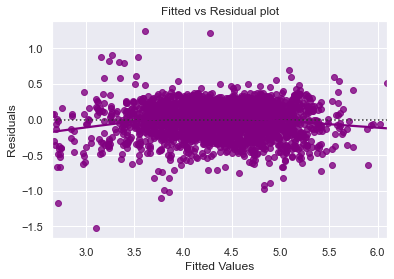

In [116]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
* We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.



### Test for normality

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.


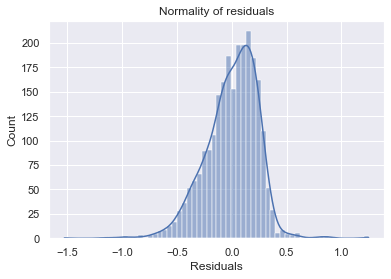

In [117]:
sns.histplot(data=df_pred,  x="Residuals", kde=True) 
plt.title("Normality of residuals")
plt.show()

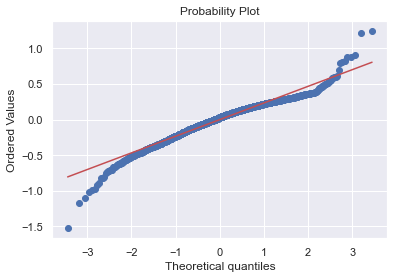

In [118]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations
* The residuals more or less follow a straight line except for the tails


In [119]:
#Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9654563665390015, pvalue=1.263385904374327e-23)

#### Observations:
* p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

### Test for homoscedasticity 

In [120]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9590347152510086), ('p-value', 0.7656965441186284)]

#### Observations:
* p-value > 0.05, so the residuals are homoscedastic.
* Assumption is satisfied

# Final Model Summary

In [121]:
# predictions on the test set
pred = olsmod3.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1174,94.430815,90.520474
2247,81.238798,69.997443
2991,73.078043,62.608241
2997,79.009214,70.937322
2982,100.529127,87.712779
479,78.660741,74.299189
17,109.011245,105.944731
471,105.280149,88.683688
2918,90.069046,85.724129
602,57.177211,73.414911


#### Observations:
*  Model has returned good prediction.
* Actual used price  and predicted used price almost same.
* There is scope for improvement



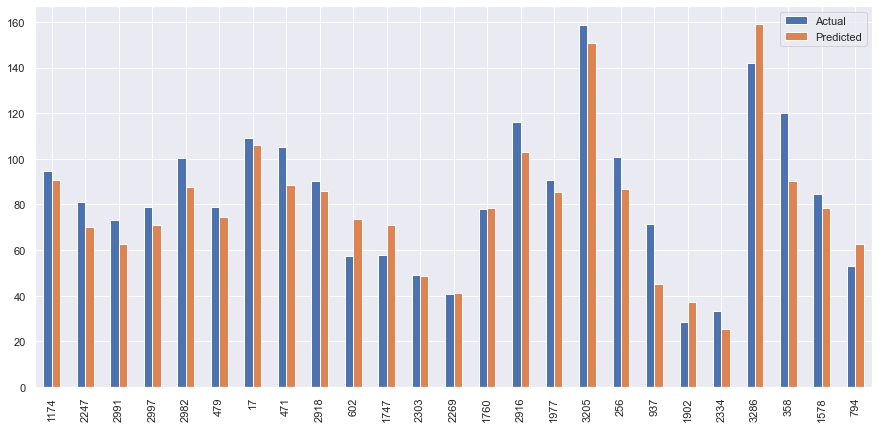

In [122]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [123]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod3, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238003,0.185018,0.83785,0.837379,4.466363


In [124]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240253,0.192091,0.830499,0.828177,4.607036


#### Observations:
* 83% of the variation in the data
* Train & Test ( RMSE and MAE) is approx .24 & .19 is low and comparable.Hence model is not suffering from overfitting.

* MAPE  4.46% 

In [125]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.233956,0.238003
MAE,0.183511,0.185018
R-squared,0.843317,0.837850
Adj. R-squared,0.842338,0.837379
MAPE,4.426338,4.466363


In [126]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.234395,0.240253
MAE,0.188638,0.192091
R-squared,0.838664,0.830499
Adj. R-squared,0.836294,0.828177
MAPE,4.509229,4.607036


#### Observations:
* Model performance is very close to each other.

In [127]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2075.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:54:20   Log-Likelihood:                 39.959
No. Observations:                2417   AIC:                            -65.92
Df Residuals:                    2410   BIC:                            -25.39
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2017      0.042  

# Conclusion

* Most of the devices have Android OS.
* EDA proves expensive brands have max no of devices.
* there is relation between weight of phone and battery.
* Expensive brands have large screen
* Expensive brands have good selfie camera.
* There is less no of less price devices.
* If selfie camera, screen size, memory increases price increase.
* Used price have strong relation with new price.
* 4G and 5g has influence in price.
* Weight doesn't have much influence on price.

* All assumption for linear regression is met (multicolinearity,VIF>5,homoscedasticity).
 


# Further Analysis

* Actual and predicted (used_price) are comparable, although there is further scope for improvement.